---

<h1> <center> ProjectOAK </center> </h1>  

<h3> <center> By Sam Evans and Maria Yampolskaya </center> </h3>

---

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os #to check if model weights exist.

try:
    import QOL.plots as pqol #custom plotting stuff for Sam
    pqol.fixfigsize((1,1))
    pqol.scale_fonts((2,2))
except:
    print('pqol not loaded, defaulting to matplotlib.pyplot.')
    pqol=plt

import ImageProcessing as ip #ProjectOAK file with image processing functions.
import  DataProcessing as dp #ProjectOAK file with data  processing functions.
#''' #comment this line if actively editting ImageProcessing.py, to force reloads.
from importlib import reload 
reload(ip)
reload(dp)
#''';

<module 'DataProcessing' from '/Users/Sevans/Python/ProjectOAK/DataProcessing.py'>

In [113]:
SHOW_EXAMPLES = False          #whether to show examples throughout notebook. If False, hide most examples, for brevity.
Ntypes = dp.NTYPES             #number of types; probably 18; could be less if using "metatypes".

---
<h2> <center> Load the Pokémon Data! </center> </h2>  

---

In [114]:
## Options here.
READ_DATA     = [1,2,3]     #which folders to read data from.
INCLUDE_DATA  = [1,2,3]     #which folders to include.
CHANNEL_SHAPE = (120,120)   #choose shape for images. (for a single channel of the image.)
REREAD = False              #whether to reread images if a get_images cell is run more than once.

#folders to read from:
dp.IMAGESFOLDER1J = dp.IMAGESFOLDER1J  #enter a custom folder on the right if desired.
dp.IMAGESFOLDER2J = dp.IMAGESFOLDER2J  #enter a custom folder on the right if desired.
dp.IMAGESFOLDER3  = dp.IMAGESFOLDER3   #enter a custom folder on the right if desired.

for i in INCLUDE_DATA: assert i in READ_DATA

## Final variables which will store all the info:
used_rows_compiled   = []
used_labels_compiled = []
used_images_compiled = []
compiled_already = []    #track what has already been compiled; ensures no errors if a cell below is run more than once.
read_already = []        #track what has already been read; ensures no rereading if reread is false and a cell is run more than once.

In [115]:
## get data from csv file about pokemon.
csvdata, cc = dp.read_csv(dp.CSVFILE2)

Took  0.01 seconds to read data from dataset/Pokedex_Ver6.csv


## Get images from `IMAGESFOLDER1J`.
This is the dataset we started with originally. Image names are pokemon names. (J is for jpg)

In [116]:
if 1 in READ_DATA and (REREAD or not 1 in read_already):
    allimages1   = ip.get_all_images(dp.IMAGESFOLDER1J)
    if 1 not in read_already: read_already+=[1]   #just for convenience, doesn't do any reading work.

got all 809 images in  0.34 seconds (from folder = dataset/images/image_jpgs)


In [117]:
if 1 in INCLUDE_DATA:
    imagekeys1   = np.array(list(allimages1.keys()))
    imagekeys_title1 = np.array([key.title() for key in imagekeys1])
    seris1       = np.array(dp.pokes_to_S(imagekeys_title1, csvdata))    #serial numbers
    idx_include1 = (seris1 != '')
    used_images1 = np.array([allimages1[key] for key in imagekeys1[idx_include1]])
    used_rows1   = np.array(dp.vectorized_row_where(seris1[idx_include1], csvdata, cc.SERIAL))
    used_types1  = csvdata[used_rows1, cc.TYPE1]
    used_labels1 = dp.type_to_idx(used_types1)
    
    if 1 in compiled_already: print('Already compiled 1. If desired, reset via cell at top of section.')
    else:
        used_rows_compiled   += [used_rows1]
        used_labels_compiled += [used_labels1]
        used_images_compiled += [ip.resize_images(used_images1, CHANNEL_SHAPE)]
        compiled_already += [1]

(No resizing necessary; image shape is already the desired shape.)


## Get images from `IMAGESFOLDER2J`.
This is the ~70MB dataset with ~800 256x256x3 images. Image names are pokemon numbers. (J is for jpg)

In [118]:
if 2 in READ_DATA and (REREAD or not 2 in read_already):
    allimages2 = ip.get_all_images(dp.IMAGESFOLDER2J)
    if 2 not in read_already: read_already+=[2]   #just for convenience, doesn't do any reading work.

got all 819 images in  1.13 seconds (from folder = dataset/images/archive/pokemon_jpg/pokemon_jpg)


In [119]:
if 2 in INCLUDE_DATA:
    imagekeys2   = np.array(list(allimages2.keys()))
    seris2       = np.array(dp.Ns_to_S(imagekeys2, csvdata, code=1))    #serial numbers
    idx_include2 = (seris2 != '')
    used_images2 = np.array([allimages2[key] for key in imagekeys2[idx_include2]])
    used_rows2   = np.array(dp.vectorized_row_where(seris2[idx_include2], csvdata, cc.SERIAL))
    used_types2  = csvdata[used_rows2, cc.TYPE1]
    used_labels2 = dp.type_to_idx(used_types2)
    
    if 2 in compiled_already: print('Already compiled 2. If desired, reset via cell at top of section.')
    else:
        used_rows_compiled   += [used_rows2]
        used_labels_compiled += [used_labels2]
        used_images_compiled += [ip.resize_images(used_images2, CHANNEL_SHAPE)]
        compiled_already += [2]

Took  1.49 seconds to resize images


## Get images from `IMAGESFOLDER3`.
This is the ~1.2GB dataset which has many images of each of the original 150 pokes.
- Structured as a folder with subfolders.
- Each subfolder is named with a pokemon name and contains images of that pokemon.
- The image shapes and filetypes are not standardized.
- See `ImageProcessing.images_from_folders_in_dir` for more details on how we process the data.

In [120]:
if 3 in READ_DATA and (REREAD or not 3 in read_already):
    N_images_per_poke = 10  #maximum number of images to get from each folder.
    shape3 = CHANNEL_SHAPE  #resizes each channel of each image to this shape.
    allimages3 = ip.images_from_folders_in_dir(dp.IMAGESFOLDER3, some=N_images_per_poke, shape=shape3) 
    if 3 not in read_already: read_already+=[3]   #just for convenience, doesn't do any reading work.

Loading up to 30 images from each folder. Set kwarg "some" to another value to change this number.
Finished in 157.30 seconds.                                                     


In [121]:
if 3 in INCLUDE_DATA:
    imagekeys3   = np.array(list(allimages3.keys()))
    seris3       = np.array(dp.pokes_to_S(imagekeys3, csvdata)) #serial numbers
    idx_include3 = (seris3 != '')  #ignore names not in csvdata. E.g. 'MrMime' (folder) vs 'Mr. Mime' (name in csvdata).
    used_imlists3 = np.array([allimages3[key] for key in imagekeys3[idx_include3]]) #each is a list of (up to <some>) images rather than a single image.
    used_rows3   = np.array(dp.vectorized_row_where(seris3[idx_include3], csvdata, cc.SERIAL))
    used_types3  = csvdata[used_rows3, cc.TYPE1]
    used_labels3 = dp.type_to_idx(used_types3)
    used_images3, fidx3 = ip.flatten_imlists(used_imlists3)

    if 3 in compiled_already: print('Already compiled 3. If desired, reset via cell at top of section.')
    else:
        used_rows_compiled   += [used_rows3[fidx3]]
        used_labels_compiled += [used_labels3[fidx3]]
        used_images_compiled += [ip.resize_images(used_images3, CHANNEL_SHAPE)]
        compiled_already += [3]


(No resizing necessary; image shape is already the desired shape.)


## Data compiled into single place for convenience

In [122]:
if 0 in compiled_already: print('Already concatenated compiled variables. If desired, reset via cell at top of section.')
else:
    used_rows_compiled   = np.concatenate(used_rows_compiled)
    used_images_compiled = np.concatenate(used_images_compiled)
    used_labels_compiled = np.concatenate(used_labels_compiled)
    compiled_already += [0]
    print('Data compiled fully; concatenation complete.')
if SHOW_EXAMPLES: print('Shape of used_images_compiled:',used_images_compiled.shape) 

Data compiled fully; concatenation complete.


---
<h2> <center> Create Dataset Class Object </center> </h2>  

---
Note that `do_scaling=False` is fine if we are using data augmentation with `featurewise_center=True, featurewise_std_normalization=True`.

In [124]:
#'''
## make dataset with only stuff from IMAGESFOLDER2J
identifiers = csvdata[used_rows_compiled][:,[cc.NAME, cc.TYPE1, cc.TYPE2]]
#dd = dp.Full_Dataset(used_images2/255., meta_labels2, serials=identifiers, val_size=0.2, test_size=0.1, do_scaling=False)
dd = dp.Full_Dataset(used_images_compiled/255., used_labels_compiled, serials=identifiers,
                     val_size=0.2, test_size=0.1, do_scaling=False, watch_dups=True)

print('train_size: ', dd.train_size, ', val_size: ', dd.val_size, ', test_size: ', dd.test_size, sep='')

"""
## weight classes to counteract data imbalance.
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=range(MTYPES), y=dd.train_labels)
class_weight_dict = dict(enumerate(class_weights))
if SHOW_EXAMPLES: print(class_weight_dict)
#""";
#''';

|> Splitting data; ensuring duplicates stay together.
|> "Duplicates" determined by whether serials match. E.g. serial[0] = ['Staraptor' 'Normal' 'Flying']
| setting: train_data     | setting: val_data       | setting: test_data      
| setting: train_labels   | setting: val_labels     | setting: test_labels    
| setting: train_serials  | setting: val_serials    | setting: test_serials   
train_size: 4123, val_size: 1177, test_size: 588


In [125]:
#read image shape
IMAGESHAPE = dd.train_data[0].shape
print("shape of images:",IMAGESHAPE)

shape of images: (120, 120, 3)


---
<h2> <center> A Wild Neural Network Appears! </center> </h2>  

---

## Single-type classification (the simplest problem)

In [126]:
import tensorflow as tf
from tensorflow.keras import layers, models

### Set Up Data Augmentation

In [127]:
## SET UP DATA AUGMENTATION
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #featurewise_center=True,              #center features at 0.
    #featurewise_std_normalization=True,   #divide by each feature's std.
    #rescale = 1/255.,
    #rotation_range=45,       #rotate by up to this many degrees.
    #width_shift_range=0.2,   #shift by up to this fraction of the image, horizontally.
    #height_shift_range=0.2,  #shift by up to this fraction of the image, vertically.
    #vertical_flip=True,      #whether to sometimes flip images vertically.
    #horizontal_flip=True,    #whether to sometimes flip images horizontally.
    #zoom_range=0.2,          #zoom random within [0.8 .. 1.2]
    #shear_range=0.2,         #range for shear transformations
    #fill_mode='constant',    #fill extra pixels with constant
    #cval=255                 #constant = 255 ( --> 'white')
)
now=time.time()
datagen.fit(dd.train_data)    #fit to training data (and ONLY TRAINING DATA)
print('took {:5.2f} seconds to fit datagen.'.format(time.time()-now))

took  1.18 seconds to fit datagen.


In [128]:
#datagen.flow makes an iterator which returns
#     <batch_size> manipulated images (and original labels) from the input data given to it.
if SHOW_EXAMPLES:
    B = 10
    ims, lbs = next(datagen.flow(dd.train_data, dd.train_serials[:,0], batch_size=B))
    fig, axs = plt.subplots(2, B, figsize=(B,3))
    plt.suptitle('examples of augmented data images')
    for i in range(B):
        plt.sca(axs[0][i])
        plt.imshow(ims[i])
        plt.gca().yaxis.set_visible(False)
        plt.gca().xaxis.set_visible(False)
        plt.title(str(lbs[i]))

        plt.sca(axs[1][i])
        plt.imshow(dd.train_data[dd.train_serials[:,0]==lbs[i]][0]) #(this line is slow)
        plt.gca().yaxis.set_visible(False)
        plt.gca().xaxis.set_visible(False)
        plt.title('(original)')
    plt.tight_layout()
    plt.show()

### Define Network Architecture

In [129]:
def create_CNN():
    num_classes = Ntypes

    model = models.Sequential()
    
    #parameters: layers.Conv2D(numfilters, kernel_size, strides)
    model.add(layers.Conv2D(5, 2, 1, input_shape = IMAGESHAPE))
    model.add(layers.Activation('relu'))
    model.add(layers.AveragePooling2D(pool_size = (2,2)))
    
    model.add(layers.Conv2D(10, 4, 2, input_shape = IMAGESHAPE))
    model.add(layers.Activation('relu'))
    model.add(layers.AveragePooling2D(pool_size = (2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes * 3, activation = 'relu'))
    model.add(layers.Dense(num_classes, activation = 'softmax'))

    metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=1, name='stk1'),
               tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='stk3'),
               tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='stk5')]
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    style = dict(metrics=metrics, loss=loss)
    
    #model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), **style)
    #model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.2, nesterov=False, name="SGD"), **style)
    model.compile(optimizer=tf.keras.optimizers.RMSprop(), **style)
    
    #
    return model

In [130]:
model = create_CNN()
#model.summary()

### Train the Network

In [131]:
epochs = 50
batch_size = 32
verbose = 1

measure = dict(monitor='stk1', mode='max')

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0, patience=50, verbose=0,
    baseline=None, restore_best_weights=True, **measure
)

# this line will SAVE the model weights to a file:
checkpointing = tf.keras.callbacks.ModelCheckpoint('model_checkpoints/myfirstmodel.h5',
    verbose=0, save_best_only=True, **measure)

callbacks = [early_stopping, checkpointing]

'''
history = model.fit(datagen.flow(dd.train_data, dd.train_labels, batch_size=batch_size),
          #          class_weight = class_weight_dict,
                    validation_data=(dd.val_data, dd.val_labels),
                    steps_per_epoch=len(dd.train_data) / batch_size, epochs=epochs,
                    callbacks = callbacks, verbose=verbose)
'''


history = model.fit(dd.train_data, dd.train_labels,
                    validation_data=(dd.val_data, dd.val_labels),
                    batch_size=batch_size,
#                    class_weight = class_weight_dict,
                    epochs=epochs,
                    callbacks = callbacks,
                    verbose=verbose)

# train the data for 500 epochs
#model.fit(data_train, labels_train, batch_size = 32, epochs = 500, verbose=1, validation_split = 0.1)
#model.evaluate(dd['val']['data'], dd['val']['labels'])

Epoch 1/50
131/131 [==============================] - 7s 54ms/step - loss: 2.7945 - stk1: 0.1812 - stk3: 0.4039 - stk5: 0.5495 - val_loss: 2.8066 - val_stk1: 0.1707 - val_stk3: 0.3347 - val_stk5: 0.4230
Epoch 2/50
131/131 [==============================] - 7s 53ms/step - loss: 2.7542 - stk1: 0.2256 - stk3: 0.4154 - stk5: 0.5586 - val_loss: 2.8455 - val_stk1: 0.1320 - val_stk3: 0.3768 - val_stk5: 0.4945
Epoch 3/50
131/131 [==============================] - 7s 56ms/step - loss: 2.7431 - stk1: 0.2395 - stk3: 0.4039 - stk5: 0.5469 - val_loss: 2.8051 - val_stk1: 0.1741 - val_stk3: 0.3398 - val_stk5: 0.4205
Epoch 4/50
131/131 [==============================] - 7s 56ms/step - loss: 2.7305 - stk1: 0.2508 - stk3: 0.4094 - stk5: 0.5387 - val_loss: 2.8225 - val_stk1: 0.1564 - val_stk3: 0.3423 - val_stk5: 0.4172
Epoch 5/50
131/131 [==============================] - 10s 79ms/step - loss: 2.7252 - stk1: 0.2578 - stk3: 0.4171 - stk5: 0.5372 - val_loss: 2.8198 - val_stk1: 0.1606 - val_stk3: 0.3549 - v

### Check network performance vs epoch

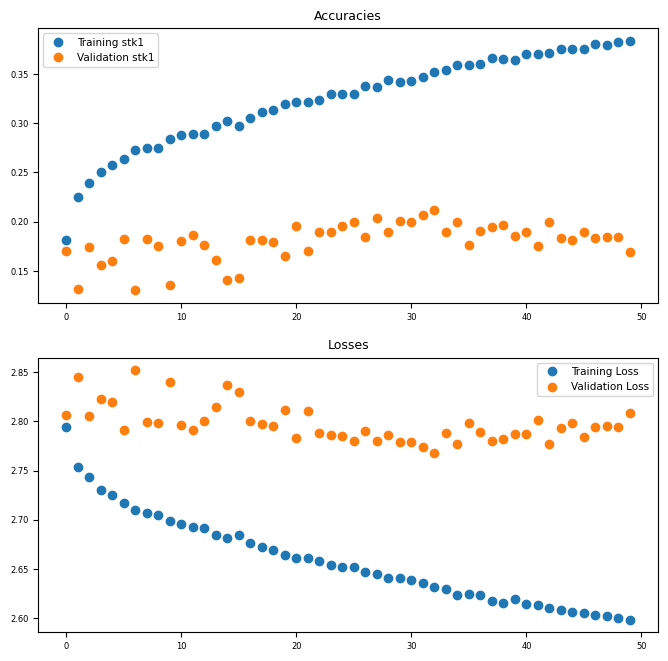

Maximum validation accuracy achieved: 0.21194280683994293


In [132]:
show_histories = 1
accstr = 'stk1'
accstr2 = None

if show_histories:
    epochs = len(history.history['loss'])

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(range(epochs), history.history[accstr], 'o', label='Training '+accstr)
    plt.plot(range(epochs), history.history['val_'+accstr], 'o', label='Validation '+accstr)
    if accstr2 is not None:
        plt.plot(range(epochs), history.history[accstr2], 'x', label='Training '+accstr2)
        plt.plot(range(epochs), history.history['val_'+accstr2], 'x', label='Validation '+accstr2)
    plt.legend()
    plt.title('Accuracies')

    plt.subplot(2, 1, 2)
    plt.plot(range(epochs), history.history['loss'], 'o', label='Training Loss')
    plt.plot(range(epochs), history.history['val_loss'], 'o', label='Validation Loss')
    plt.legend()
    plt.title('Losses')
    plt.show()

    print("Maximum validation accuracy achieved: " + str(np.max(history.history['val_'+accstr])))

### Check predictions of model

In [133]:
## make the predictions
predictions = dp.prediction_to_idx(model.predict(dd.val_data)) #prediction = type with max probability.
assert len(predictions)==len(dd.val_data)

In [134]:
NUM_CLASSES = len(dp.ALLTYPES[:-1])
CLASSES = dp.ALLTYPES[:-1]

prediction (validation data)


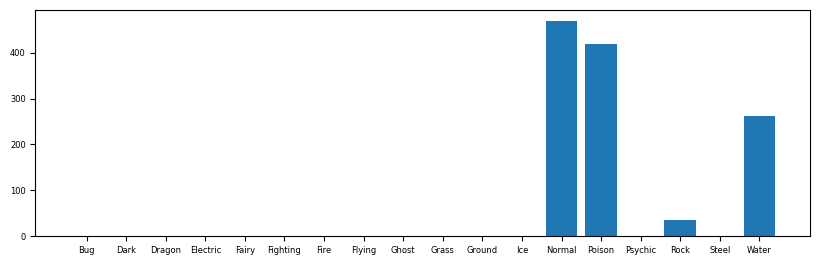

data (validation data)


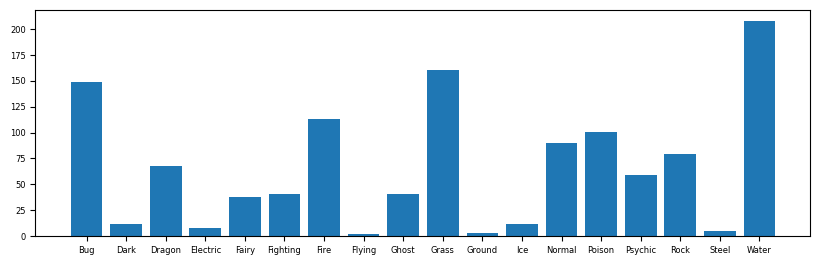

data (train data)


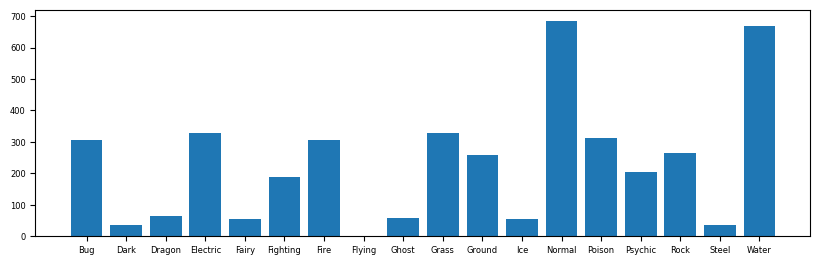

In [135]:
## show distribution of predicted types & distribution of types in the validation dataset
print('prediction (validation data)')
plt.figure(figsize=(10,3))
bc_p = np.bincount(predictions, minlength=NUM_CLASSES)
plt.bar(CLASSES, bc_p);
plt.show()
print('data (validation data)')
plt.figure(figsize=(10,3))
bc_v = np.bincount(dd.val_labels, minlength=NUM_CLASSES)
plt.bar(CLASSES, bc_v);
plt.show()
print('data (train data)')
plt.figure(figsize=(10,3))
bc_t = np.bincount(dd.train_labels, minlength=NUM_CLASSES)
plt.bar(CLASSES, bc_t);
plt.show()

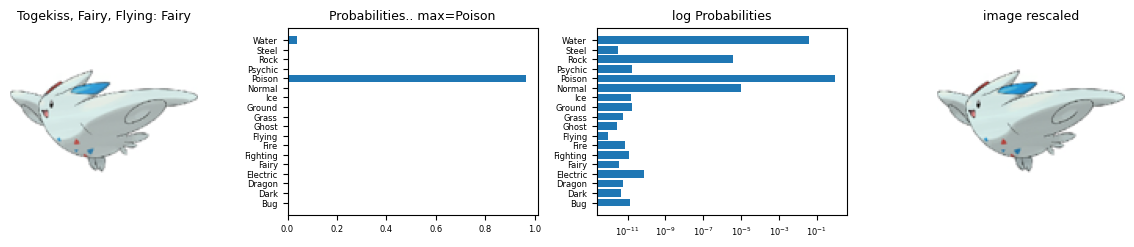

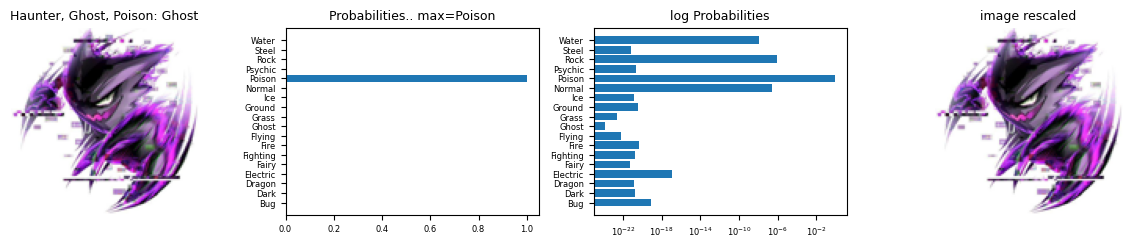

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


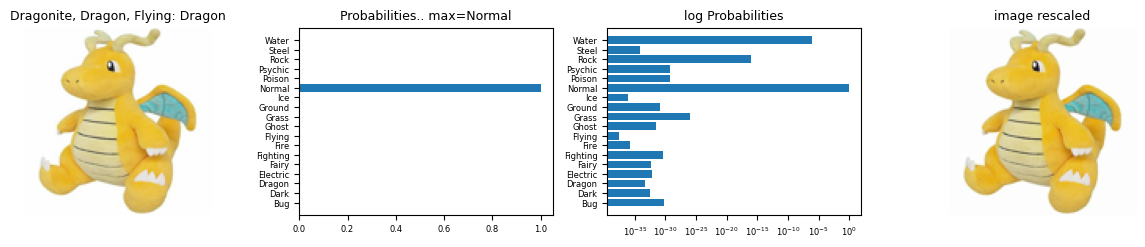

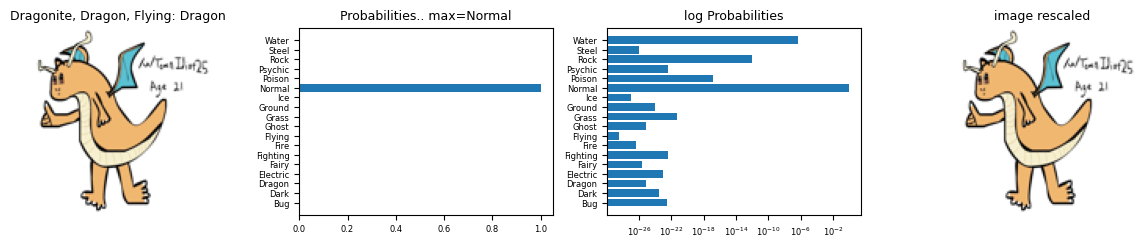

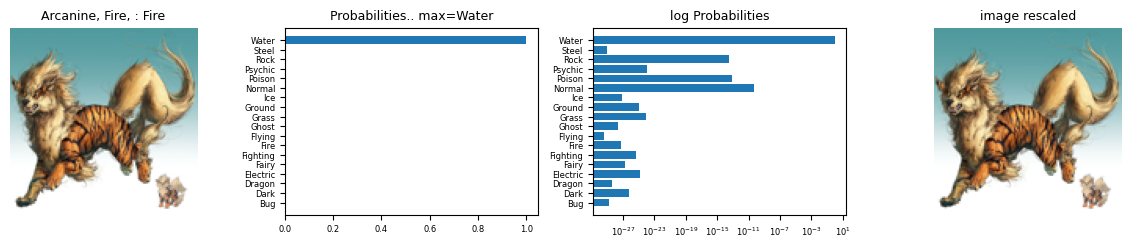

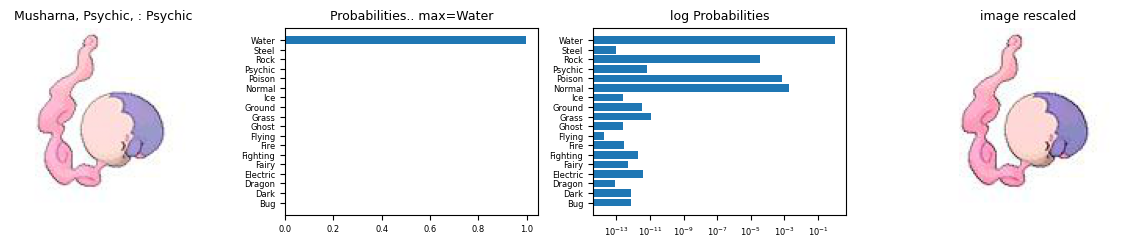

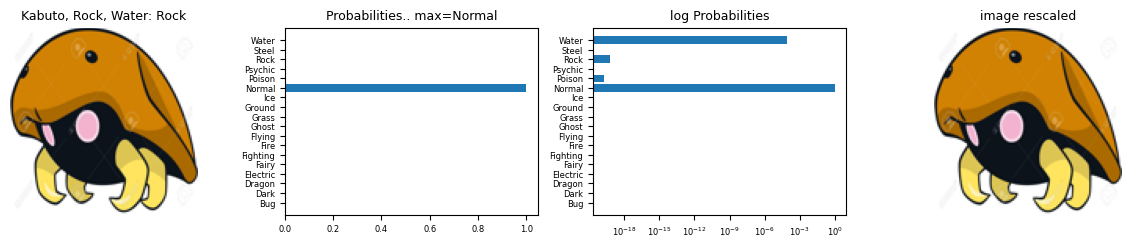

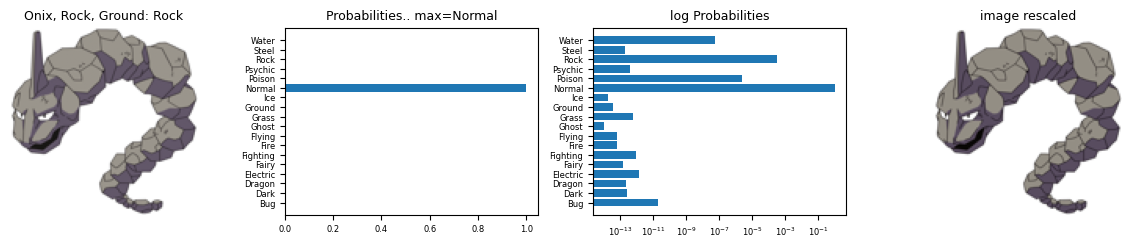

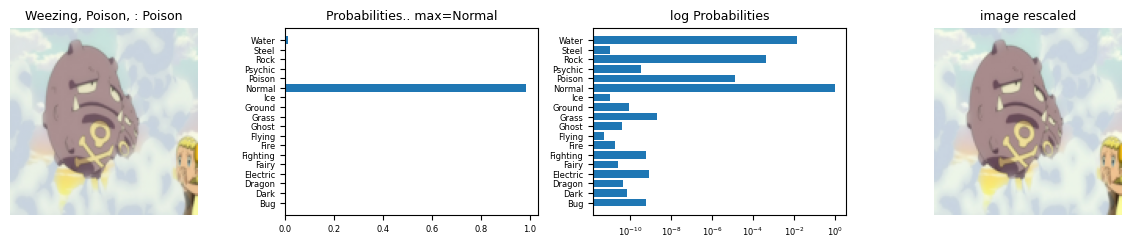

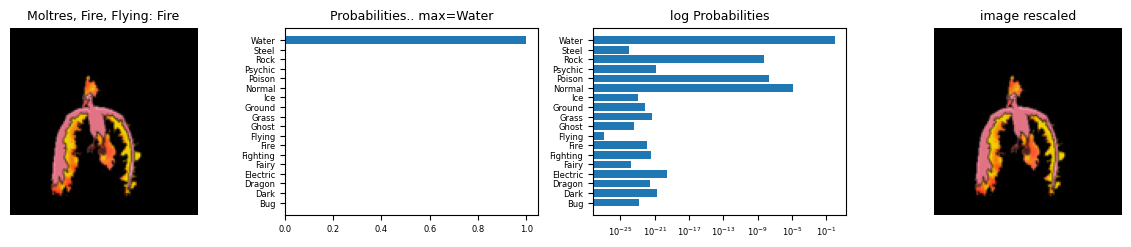

In [136]:
## plot prediction probabilities for some of the pokemon in the test set

istart = 0
istop  = 10
NSAMPLES = istop - istart
slicer = np.s_[istart:istop]

lbl_to_type = dp.idx_to_type

imgs = dd.val_data[slicer]
lbls = dd.val_labels[slicer]
nms  = dd.val_serials[slicer]
preds = model.predict(imgs)

for i in range(NSAMPLES):
    fig, axs = plt.subplots(1, 4, figsize=[12, 2.5])
    plt.sca(axs[0])
    plt.imshow(imgs[i])
    arr = np.array(lbls[i])
    index = np.where(arr == 1)
    plt.title(', '.join(nms[i])+': '+str(lbl_to_type(lbls[i])))
    plt.axis("off")

    plt.sca(axs[1])
    plt.title("Probabilities.. max="+str(lbl_to_type(dp.prediction_to_idx(preds[i]))))
    plt.barh(CLASSES, preds[i])
    
    plt.sca(axs[2])
    plt.title("log Probabilities")
    plt.barh(CLASSES, preds[i])
    plt.xscale('log')
    
    plt.sca(axs[3])
    ip.plt_rescaled(imgs[i])
    plt.title('image rescaled')
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()